## BBM 409 - Programming Assignment 1

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  
* Please add Markdown cells to answer the (non-coding) questions in the homework text. You can, however, refer to the outputs of code cells without adding them as images to the Markdown cell unless you are requested to do otherwise.
* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. Though you are somewhat expected to abide by the comments in the below cells, they are mainly just provided for guidance. That is, as long as you are not completely off this structure and your work pattern is understandable and traceable, it is fine. For instance, you do not have to implement a particular function within a cell just because the comment directs you to do so.
* This document is also your report. Show your work.

### Durmuş Selim Özçelik 2220356116

## 1. Energy Efficiency Estimation (60 points)

### 1.1. Introduction
* Brief overview of the regression task.
* Description of the dataset used for regression analysis.

### 1.2. Data Loading and Exploration (5 points)

In [ ]:
## Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split

In [ ]:
# Load the dataset
data = pd.read_csv('energy_efficiency_data.csv')

# Convert to NumPy arrays for easier handling
X = data.iloc[:, :-2].values # Features
y1 = data.iloc[:, -2].values # Heating Load
y2 = data.iloc[:, -1].values # Cooling Load

In [ ]:
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
data.shape  # Get the dimensions

(768, 10)

In [ ]:
data.info() # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
data.describe()  # View descriptive statistics

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


### 1.3. Data Preprocessing (10 points)
* Explain the preprocessing steps taken and their rationale.

array([[<Axes: title={'center': 'Relative_Compactness'}>,
        <Axes: title={'center': 'Surface_Area'}>,
        <Axes: title={'center': 'Wall_Area'}>],
       [<Axes: title={'center': 'Roof_Area'}>,
        <Axes: title={'center': 'Overall_Height'}>,
        <Axes: title={'center': 'Orientation'}>],
       [<Axes: title={'center': 'Glazing_Area'}>,
        <Axes: title={'center': 'Glazing_Area_Distribution'}>,
        <Axes: title={'center': 'Heating_Load'}>],
       [<Axes: title={'center': 'Cooling_Load'}>, <Axes: >, <Axes: >]],
      dtype=object)

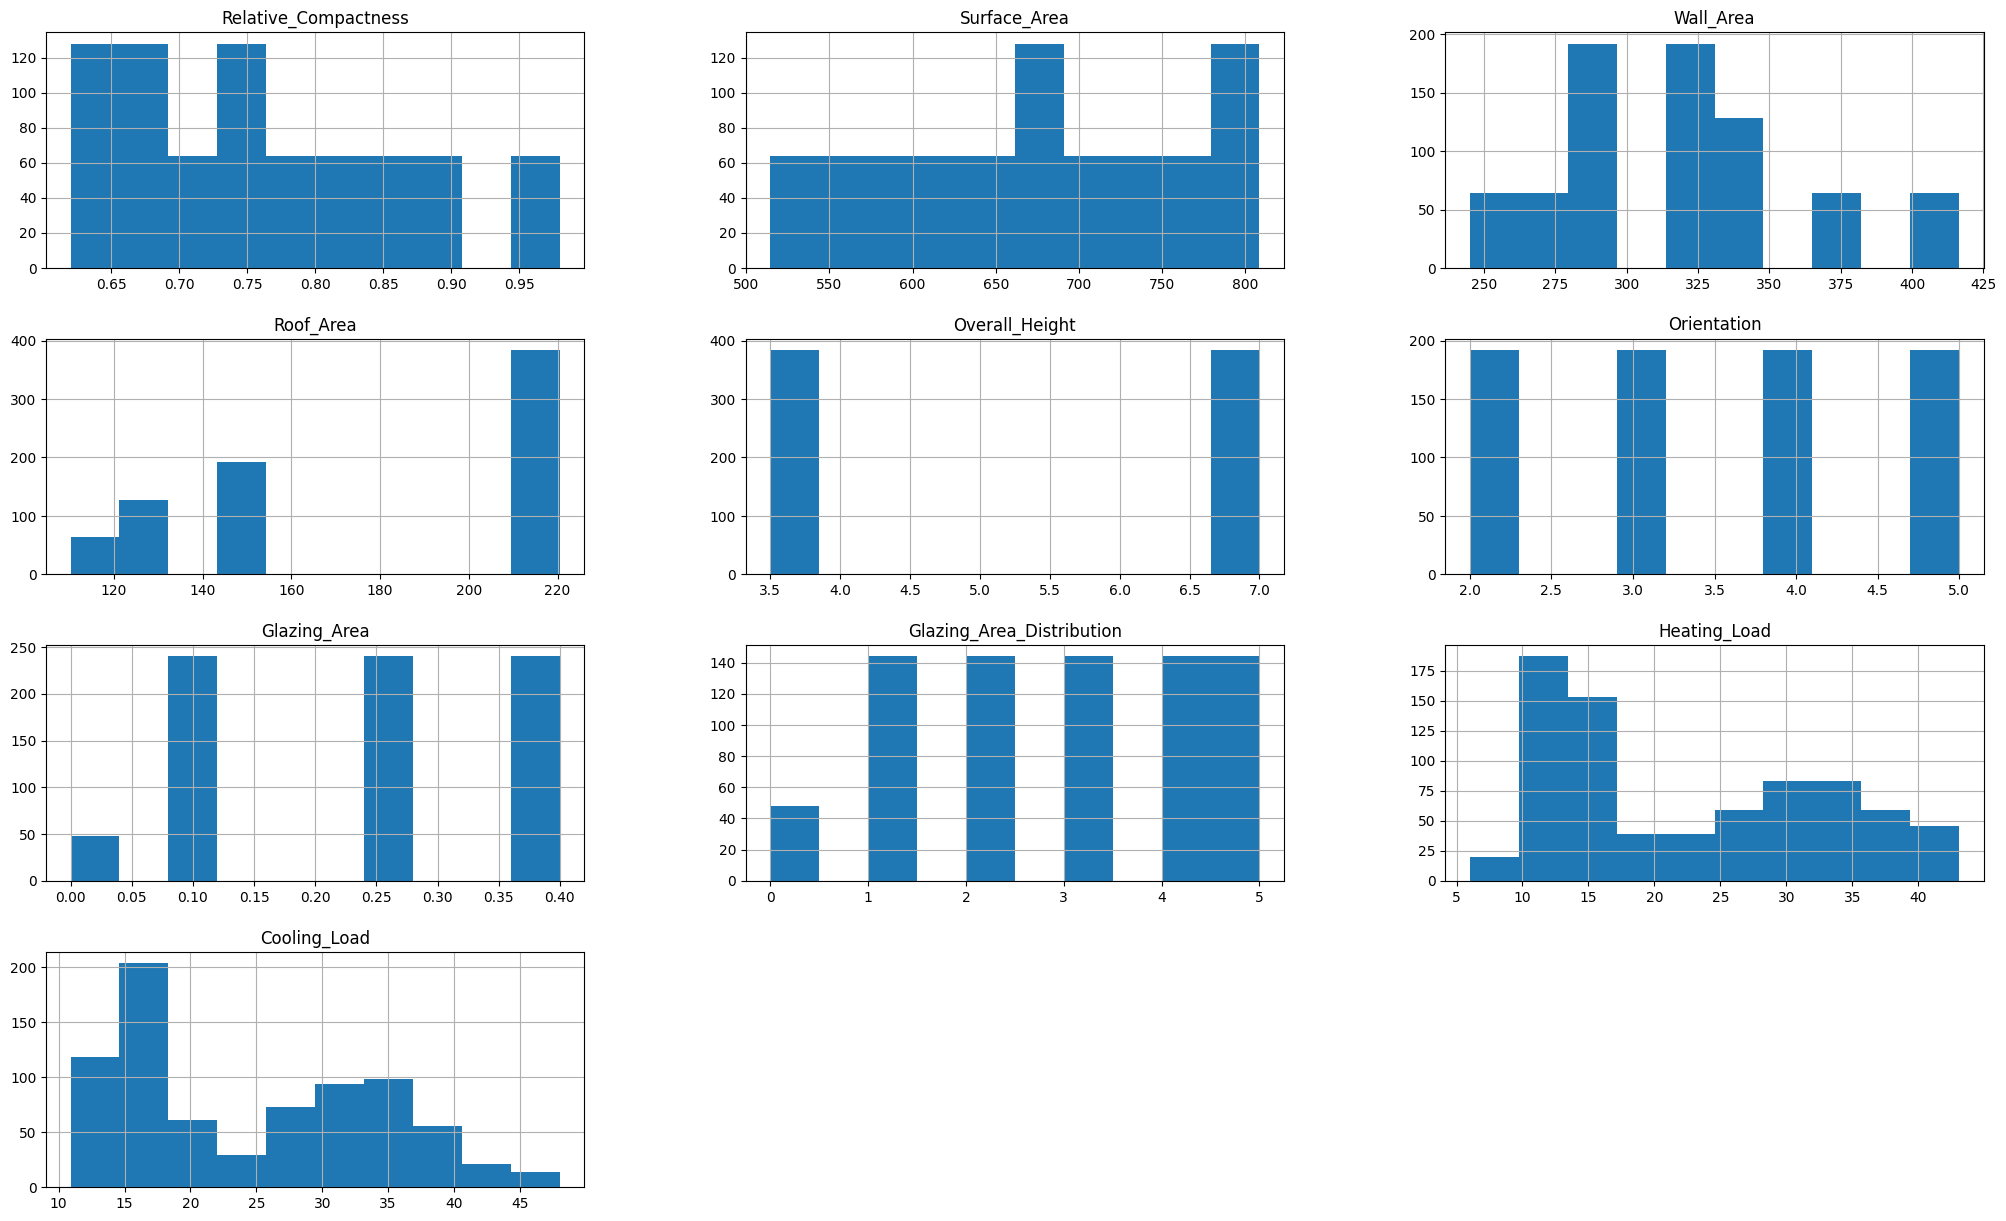

In [ ]:
# Distribution of our data
data.hist(figsize=(25,15))

In [ ]:
data.corr()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
Surface_Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
Wall_Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
Roof_Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
Overall_Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
Glazing_Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
Glazing_Area_Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating_Load,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Cooling_Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


<Axes: >

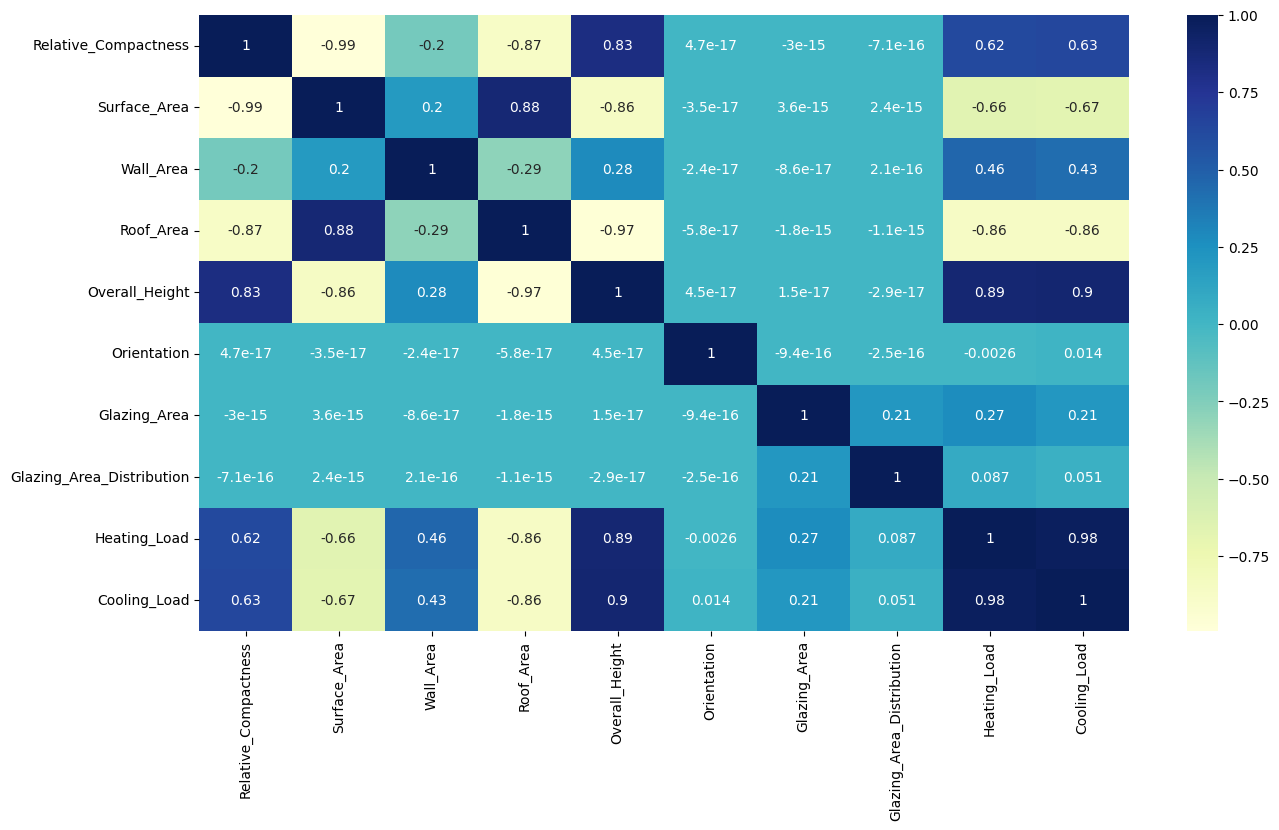

In [ ]:
# To check the missing values
data[data.isnull()].count()
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

# Inference #1
When I look at the heatmap of the correlation matrix, I see that the features ‘orientation’, 'Glazing_Area', 'Wall_Area' and ‘Glazing_Area_Distribution’ are not highly correlated with the results. Therefore, I am dropping these features for the ablation study as I don’t think they will significantly affect the results of my regression analysis.

# Inference #2
Relative_Compactness and Surface_Area are highly negatively correlated, and Overall_Height and Roof_Area are also highly negatively correlated. This indicates multicollinearity, which can make our model’s estimates less reliable. Therefore I am dropping Relative_Compactness and Roof_Area for the ablation study.

# Feature Selection Method 1 -  Manually Drop

In [ ]:
copy_of_data = data.drop(['Orientation', 'Glazing_Area_Distribution', 'Glazing_Area', 'Roof_Area', 'Surface_Area', 'Wall_Area'], axis=1)
manual_X = copy_of_data.iloc[:, :-2].values # Features

In [ ]:
copy_of_data.head

,Relative_Compactness,Overall_Height,Heating_Load,Cooling_Load
0,0.98,7.0,15.55,21.33
1,0.98,7.0,15.55,21.33
2,0.98,7.0,15.55,21.33
3,0.98,7.0,15.55,21.33
4,0.90,7.0,20.84,28.28


# Feature Selection Method 2 \- Mutual Information Selection

In [ ]:
def select_features_by_mutual_information(X, y, k=8):
    """
    Select the top k features based on mutual information
    Arguments:
        X - numpy array with candidate features
        y - numpy array with the target
        k - number of top features to select
    Returns: numpy array with selected features
    """
    selector = SelectKBest(mutual_info_regression, k=k)
    selector.fit(X, y)
    return X[:, selector.get_support()]

# Feature Scaling Method 1 - Normalization

In [ ]:
def normalization(arr):
    """
    Normalize the data in the numpy array to the range [0, 1].
    :param arr: numpy array.
    :return: Normalized numpy array.
    """
    return (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

# Feature Scaling Method 2 - Standardization

In [ ]:
def standardization(arr):
    """
    Standardize the data in the numpy array to have mean 0 and standard deviation 1.
    :param arr: numpy array.
    :return: Standardized numpy array.
    """
    return (arr - np.mean(arr)) / np.std(arr)

In [ ]:
print(data.isnull().sum())

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64


### 1.4. Linear Regression Model (15 points)
* Explain the reason behind the application of linear regression on this type of data.

The goal of applying linear regression on this type of data could be to understand how the target variable changes as the features change. For example, we might want to predict the value of the target variable for a new set of features.

In [ ]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [ ]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

Why do i choose 80-20 ratio?
Actually 80-20 split for training is a common practice. The model needs a sufficient amount of data to learn from. 80% portion ensures that the model has enough data to learn. The seperate validation helps to prevent overfitting.


I performed the Train Split operation here.

In [ ]:
feature_selection_methods = [None, "manual", select_features_by_mutual_information]
scaling_methods = [None, normalization, standardization]
results_list = []
for fs_method in feature_selection_methods:
    for scaling_method in scaling_methods:
        X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
        X_train_manual, X_test, y1_train, y1_test = train_test_split(manual_X, y1, test_size=0.2, random_state=42)
        # Özellik seçimi
        if fs_method == "manual":
          X_new = X_train_manual
        elif fs_method is not None and fs_method != "manual":
            X_new = fs_method(X_train, y1_train)  # y1 için özellik seçimi
        else:
            X_new = X_train

        if scaling_method is not None:
            X_scaled = scaling_method(X_new)
        else:
            X_scaled = X_new
        # Modeli eğitin ve tahminler yapın
        model = LinearRegression()
        model.fit(X_scaled, y1_train)
        y1_pred = model.predict(X_scaled)
        mse_y1 = mse(y1_train, y1_pred)


        X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)
        X_train_manual2, X_test, y1_train, y1_test = train_test_split(manual_X, y2, test_size=0.2, random_state=42)

        # Özellik seçimi
        if fs_method == "manual":
            X_new = X_train_manual2
        elif fs_method is not None and fs_method != "manual":
            X_new = fs_method(X_train, y2_train)  # y2 için özellik seçimi
        else:
            X_new = X_train

        if scaling_method is not None:
            X_scaled = scaling_method(X_new)
        else:
            X_scaled = X_new
        model.fit(X_scaled, y2_train)
        y2_pred = model.predict(X_scaled)
        mse_y2 = mse(y2_train, y2_pred)

        # Sonuçları DataFrame'e ekleyin
        if(fs_method == select_features_by_mutual_information):
          fs_method_string = "Select Features By Mutual Information"
        elif(fs_method == "manual"):
          fs_method_string = "Manual"
        else:
          fs_method_string = fs_method
        if(scaling_method == normalization):
          scaling_method_string = "Normalization"
        elif (scaling_method == standardization):
          scaling_method_string = "Standardization"
        else:
          scaling_method_string = None
        results_list.append({
            'Feature_Selection': fs_method_string,
            'Scaling': scaling_method_string,
            'MSE_Y1': mse_y1,
            'MSE_Y2': mse_y2
        })
        predictions_df = pd.DataFrame(results_list)

print(predictions_df.to_string(index=False))


<ipython-input-56-b8f4050213d1>:24: RuntimeWarning: invalid value encountered in subtract
  self.weights -= self.lr * dw
<ipython-input-56-b8f4050213d1>:24: RuntimeWarning: invalid value encountered in subtract
  self.weights -= self.lr * dw
<ipython-input-56-b8f4050213d1>:24: RuntimeWarning: invalid value encountered in subtract
  self.weights -= self.lr * dw


                    Feature_Selection         Scaling     MSE_Y1    MSE_Y2
                                 None            None        NaN       NaN
                                 None   Normalization 102.562916 93.664993
                                 None Standardization  41.522129 38.335045
                               Manual            None  20.870447 17.693923
                               Manual   Normalization  34.287336 27.853849
                               Manual Standardization  20.684981 17.353318
Select Features By Mutual Information            None        NaN       NaN
Select Features By Mutual Information   Normalization 102.562916 93.664993
Select Features By Mutual Information Standardization  41.522129 38.335045


In my experiments, I see that if I don’t scale the inputs other than the feature selection I do manually, the gradient descent algorithm can’t make the necessary calculations and I get NaN results. I tried two methods for Feature Selection, one of which I went to the drop method according to correlations manually. I explained above how I dropped it. Here you can see that I got the best result with Manual feature_selection and standardization.

# Ablation Study for Select Features By Mutual Information

*Heating Load*

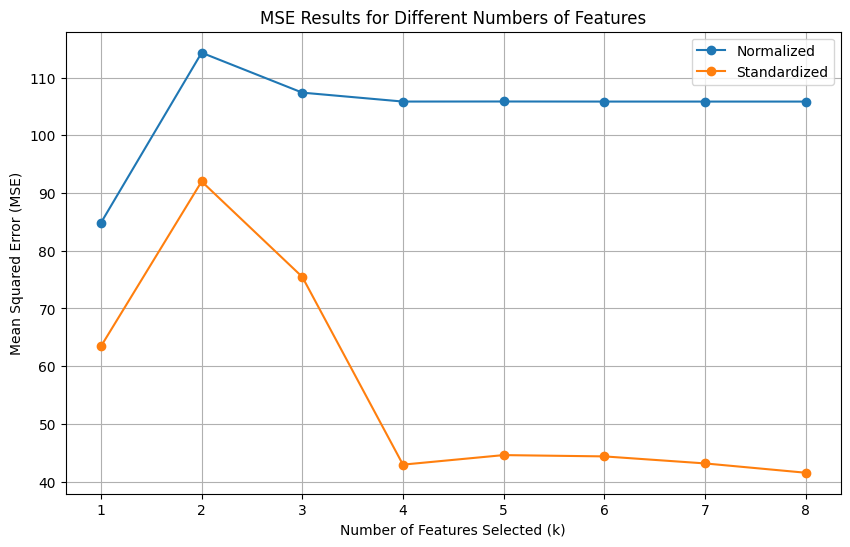

In [ ]:
mse_results_normalized = []
mse_results_standardized = []

# Loop over k values from 1 to 8
for k in range(1, 9):
    # Select features
    X_selected = select_features_by_mutual_information(X, y1, k=k)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y1, test_size=0.2, random_state=42)

    # Apply normalization
    X_train_normalized = normalization(X_train)
    X_test_normalized = normalization(X_test)
    # Fit the model and make predictions
    model = LinearRegression()
    model.fit(X_train_normalized, y_train)
    y_pred = model.predict(X_test_normalized)
    # Calculate MSE and store the result
    mse_result = mse(y_test, y_pred)
    mse_results_normalized.append(mse_result)

    # Apply standardization
    X_train_standardized = standardization(X_train)
    X_test_standardized = standardization(X_test)
    # Fit the model and make predictions
    model = LinearRegression()
    model.fit(X_train_standardized, y_train)
    y_pred = model.predict(X_test_standardized)
    # Calculate MSE and store the result
    mse_result = mse(y_test, y_pred)
    mse_results_standardized.append(mse_result)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), mse_results_normalized, marker='o', label='Normalized')
plt.plot(range(1, 9), mse_results_standardized, marker='o', label='Standardized')
plt.title('MSE Results for Different Numbers of Features')
plt.xlabel('Number of Features Selected (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()




*Cooling Load*

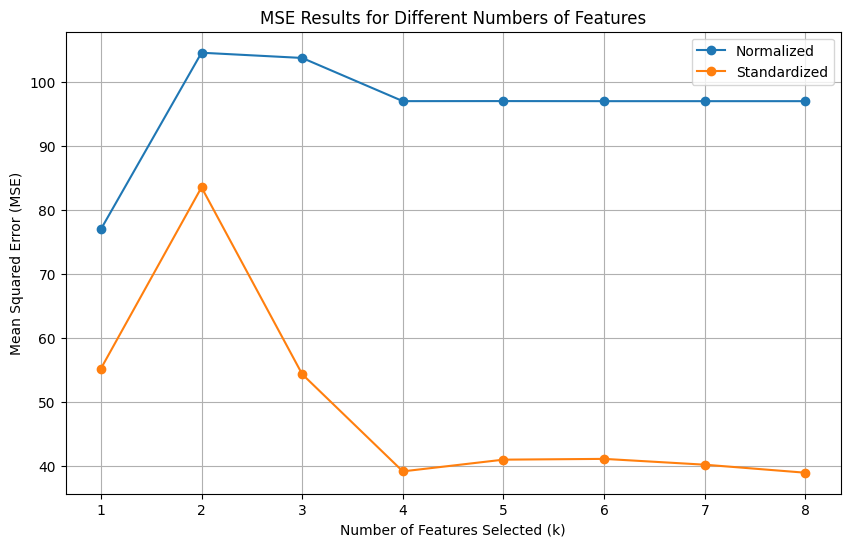

In [ ]:
mse_results_normalized = []
mse_results_standardized = []

# Loop over k values from 1 to 8
for k in range(1, 9):
    # Select features
    X_selected = select_features_by_mutual_information(X, y2, k=k)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y2, test_size=0.2, random_state=42)

    # Apply normalization
    X_train_normalized = normalization(X_train)
    X_test_normalized = normalization(X_test)
    # Fit the model and make predictions
    model = LinearRegression()
    model.fit(X_train_normalized, y_train)
    y_pred = model.predict(X_test_normalized)
    # Calculate MSE and store the result
    mse_result = mse(y_test, y_pred)
    mse_results_normalized.append(mse_result)

    # Apply standardization
    X_train_standardized = standardization(X_train)
    X_test_standardized = standardization(X_test)
    # Fit the model and make predictions
    model = LinearRegression()
    model.fit(X_train_standardized, y_train)
    y_pred = model.predict(X_test_standardized)
    # Calculate MSE and store the result
    mse_result = mse(y_test, y_pred)
    mse_results_standardized.append(mse_result)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), mse_results_normalized, marker='o', label='Normalized')
plt.plot(range(1, 9), mse_results_standardized, marker='o', label='Standardized')
plt.title('MSE Results for Different Numbers of Features')
plt.xlabel('Number of Features Selected (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()


# Ablation Study for Select Features By Manual

*Heating Load*

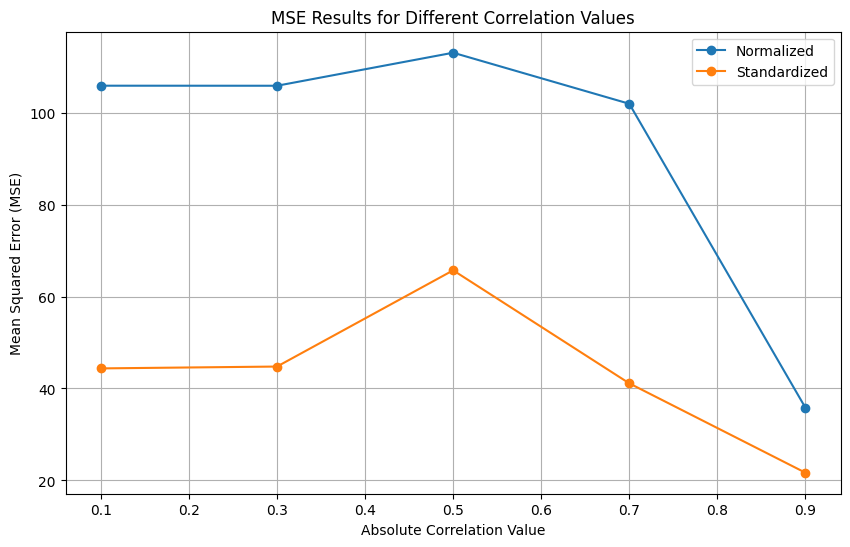

In [ ]:

# Initialize four empty lists to store the results
mse_results_normalized = []
mse_results_standardized = []

# Define the correlation values
correlation_values = [0.1, 0.3, 0.5, 0.7, 0.9]

# Loop over correlation values
copy_of_data = data.drop(['Orientation', 'Glazing_Area_Distribution'], axis=1)
manual_X = copy_of_data.iloc[:, :-2].values # Features
X_train, X_test, y_train, y_test = train_test_split(manual_X, y1, test_size=0.2, random_state=42)

# Apply normalization
X_test_normalized = normalization(X_test)
X_train_normalized = normalization(X_train)

# Fit the model and make predictions
model = LinearRegression()
model.fit(X_train_normalized, y_train)
y_pred = model.predict(X_test_normalized)
# Calculate MSE and store the result
mse_result = mse(y_test, y_pred)
mse_results_normalized.append(mse_result)

# Apply standardization
X_train_standardized = standardization(X_train)
X_test_standardized = standardization(X_test)
# Fit the model and make predictions
model = LinearRegression()
model.fit(X_train_standardized, y_train)
y_pred = model.predict(X_test_standardized)
# Calculate MSE and store the result
mse_result = mse(y_test, y_pred)
mse_results_standardized.append(mse_result)

copy_of_data = data.drop(['Orientation', 'Glazing_Area_Distribution', 'Glazing_Area'], axis=1)
manual_X = copy_of_data.iloc[:, :-2].values # Features
X_train, X_test, y_train, y_test = train_test_split(manual_X, y1, test_size=0.2, random_state=42)

# Apply normalization
X_test_normalized = normalization(X_test)
X_train_normalized = normalization(X_train)

# Fit the model and make predictions
model = LinearRegression()
model.fit(X_train_normalized, y_train)
y_pred = model.predict(X_test_normalized)
# Calculate MSE and store the result
mse_result = mse(y_test, y_pred)
mse_results_normalized.append(mse_result)

# Apply standardization
X_train_standardized = standardization(X_train)
X_test_standardized = standardization(X_test)
# Fit the model and make predictions
model = LinearRegression()
model.fit(X_train_standardized, y_train)
y_pred = model.predict(X_test_standardized)
# Calculate MSE and store the result
mse_result = mse(y_test, y_pred)
mse_results_standardized.append(mse_result)


copy_of_data = data.drop(['Orientation', 'Glazing_Area_Distribution', 'Glazing_Area', 'Wall_Area'], axis=1)
manual_X = copy_of_data.iloc[:, :-2].values # Features
X_train, X_test, y_train, y_test = train_test_split(manual_X, y1, test_size=0.2, random_state=42)

# Apply normalization
X_test_normalized = normalization(X_test)
X_train_normalized = normalization(X_train)

# Fit the model and make predictions
model = LinearRegression()
model.fit(X_train_normalized, y_train)
y_pred = model.predict(X_test_normalized)
# Calculate MSE and store the result
mse_result = mse(y_test, y_pred)
mse_results_normalized.append(mse_result)

# Apply standardization
X_train_standardized = standardization(X_train)
X_test_standardized = standardization(X_test)
# Fit the model and make predictions
model = LinearRegression()
model.fit(X_train_standardized, y_train)
y_pred = model.predict(X_test_standardized)
# Calculate MSE and store the result
mse_result = mse(y_test, y_pred)
mse_results_standardized.append(mse_result)

copy_of_data = data.drop(['Orientation', 'Glazing_Area_Distribution', 'Glazing_Area', 'Wall_Area', 'Surface_Area'], axis=1)
manual_X = copy_of_data.iloc[:, :-2].values # Features
X_train, X_test, y_train, y_test = train_test_split(manual_X, y1, test_size=0.2, random_state=42)

# Apply normalization
X_test_normalized = normalization(X_test)
X_train_normalized = normalization(X_train)

# Fit the model and make predictions
model = LinearRegression()
model.fit(X_train_normalized, y_train)
y_pred = model.predict(X_test_normalized)
# Calculate MSE and store the result
mse_result = mse(y_test, y_pred)
mse_results_normalized.append(mse_result)

# Apply standardization
X_train_standardized = standardization(X_train)
X_test_standardized = standardization(X_test)
# Fit the model and make predictions
model = LinearRegression()
model.fit(X_train_standardized, y_train)
y_pred = model.predict(X_test_standardized)
# Calculate MSE and store the result
mse_result = mse(y_test, y_pred)
mse_results_standardized.append(mse_result)

copy_of_data = data.drop(['Orientation', 'Glazing_Area_Distribution', 'Glazing_Area', 'Roof_Area', 'Wall_Area', 'Surface_Area'], axis=1)
manual_X = copy_of_data.iloc[:, :-2].values # Features
X_train, X_test, y_train, y_test = train_test_split(manual_X, y1, test_size=0.2, random_state=42)

# Apply normalization
X_test_normalized = normalization(X_test)
X_train_normalized = normalization(X_train)

# Fit the model and make predictions
model = LinearRegression()
model.fit(X_train_normalized, y_train)
y_pred = model.predict(X_test_normalized)
# Calculate MSE and store the result
mse_result = mse(y_test, y_pred)
mse_results_normalized.append(mse_result)

# Apply standardization
X_train_standardized = standardization(X_train)
X_test_standardized = standardization(X_test)
# Fit the model and make predictions
model = LinearRegression()
model.fit(X_train_standardized, y_train)
y_pred = model.predict(X_test_standardized)
# Calculate MSE and store the result
mse_result = mse(y_test, y_pred)
mse_results_standardized.append(mse_result)


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(correlation_values, mse_results_normalized, marker='o', label='Normalized')
plt.plot(correlation_values, mse_results_standardized, marker='o', label='Standardized')
plt.title('MSE Results for Different Correlation Values')
plt.xlabel('Absolute Correlation Value')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()



*Cooling Load*

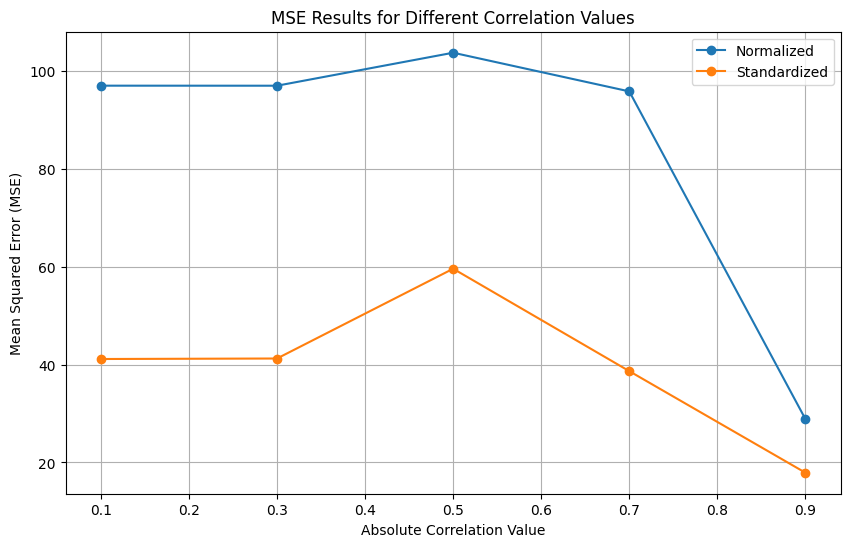

In [ ]:
# Initialize four empty lists to store the results
mse_results_normalized = []
mse_results_standardized = []

# Define the correlation values
correlation_values = [0.1, 0.3, 0.5, 0.7, 0.9]

# Loop over correlation values
copy_of_data = data.drop(['Orientation', 'Glazing_Area_Distribution'], axis=1)
manual_X = copy_of_data.iloc[:, :-2].values # Features
X_train, X_test, y_train, y_test = train_test_split(manual_X, y2, test_size=0.2, random_state=42)

# Apply normalization
X_test_normalized = normalization(X_test)
X_train_normalized = normalization(X_train)

# Fit the model and make predictions
model = LinearRegression()
model.fit(X_train_normalized, y_train)
y_pred = model.predict(X_test_normalized)
# Calculate MSE and store the result
mse_result = mse(y_test, y_pred)
mse_results_normalized.append(mse_result)

# Apply standardization
X_train_standardized = standardization(X_train)
X_test_standardized = standardization(X_test)
# Fit the model and make predictions
model = LinearRegression()
model.fit(X_train_standardized, y_train)
y_pred = model.predict(X_test_standardized)
# Calculate MSE and store the result
mse_result = mse(y_test, y_pred)
mse_results_standardized.append(mse_result)

copy_of_data = data.drop(['Orientation', 'Glazing_Area_Distribution', 'Glazing_Area'], axis=1)
manual_X = copy_of_data.iloc[:, :-2].values # Features
X_train, X_test, y_train, y_test = train_test_split(manual_X, y2, test_size=0.2, random_state=42)

# Apply normalization
X_test_normalized = normalization(X_test)
X_train_normalized = normalization(X_train)

# Fit the model and make predictions
model = LinearRegression()
model.fit(X_train_normalized, y_train)
y_pred = model.predict(X_test_normalized)
# Calculate MSE and store the result
mse_result = mse(y_test, y_pred)
mse_results_normalized.append(mse_result)

# Apply standardization
X_train_standardized = standardization(X_train)
X_test_standardized = standardization(X_test)
# Fit the model and make predictions
model = LinearRegression()
model.fit(X_train_standardized, y_train)
y_pred = model.predict(X_test_standardized)
# Calculate MSE and store the result
mse_result = mse(y_test, y_pred)
mse_results_standardized.append(mse_result)


copy_of_data = data.drop(['Orientation', 'Glazing_Area_Distribution', 'Glazing_Area', 'Wall_Area'], axis=1)
manual_X = copy_of_data.iloc[:, :-2].values # Features
X_train, X_test, y_train, y_test = train_test_split(manual_X, y2, test_size=0.2, random_state=42)

# Apply normalization
X_test_normalized = normalization(X_test)
X_train_normalized = normalization(X_train)

# Fit the model and make predictions
model = LinearRegression()
model.fit(X_train_normalized, y_train)
y_pred = model.predict(X_test_normalized)
# Calculate MSE and store the result
mse_result = mse(y_test, y_pred)
mse_results_normalized.append(mse_result)

# Apply standardization
X_train_standardized = standardization(X_train)
X_test_standardized = standardization(X_test)
# Fit the model and make predictions
model = LinearRegression()
model.fit(X_train_standardized, y_train)
y_pred = model.predict(X_test_standardized)
# Calculate MSE and store the result
mse_result = mse(y_test, y_pred)
mse_results_standardized.append(mse_result)

copy_of_data = data.drop(['Orientation', 'Glazing_Area_Distribution', 'Glazing_Area', 'Wall_Area', 'Surface_Area'], axis=1)
manual_X = copy_of_data.iloc[:, :-2].values # Features
X_train, X_test, y_train, y_test = train_test_split(manual_X, y2, test_size=0.2, random_state=42)

# Apply normalization
X_test_normalized = normalization(X_test)
X_train_normalized = normalization(X_train)

# Fit the model and make predictions
model = LinearRegression()
model.fit(X_train_normalized, y_train)
y_pred = model.predict(X_test_normalized)
# Calculate MSE and store the result
mse_result = mse(y_test, y_pred)
mse_results_normalized.append(mse_result)

# Apply standardization
X_train_standardized = standardization(X_train)
X_test_standardized = standardization(X_test)
# Fit the model and make predictions
model = LinearRegression()
model.fit(X_train_standardized, y_train)
y_pred = model.predict(X_test_standardized)
# Calculate MSE and store the result
mse_result = mse(y_test, y_pred)
mse_results_standardized.append(mse_result)

copy_of_data = data.drop(['Orientation', 'Glazing_Area_Distribution', 'Glazing_Area', 'Roof_Area', 'Wall_Area', 'Surface_Area'], axis=1)
manual_X = copy_of_data.iloc[:, :-2].values # Features
X_train, X_test, y_train, y_test = train_test_split(manual_X, y2, test_size=0.2, random_state=42)

# Apply normalization
X_test_normalized = normalization(X_test)
X_train_normalized = normalization(X_train)

# Fit the model and make predictions
model = LinearRegression()
model.fit(X_train_normalized, y_train)
y_pred = model.predict(X_test_normalized)
# Calculate MSE and store the result
mse_result = mse(y_test, y_pred)
mse_results_normalized.append(mse_result)

# Apply standardization
X_train_standardized = standardization(X_train)
X_test_standardized = standardization(X_test)
# Fit the model and make predictions
model = LinearRegression()
model.fit(X_train_standardized, y_train)
y_pred = model.predict(X_test_standardized)
# Calculate MSE and store the result
mse_result = mse(y_test, y_pred)
mse_results_standardized.append(mse_result)


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(correlation_values, mse_results_normalized, marker='o', label='Normalized')
plt.plot(correlation_values, mse_results_standardized, marker='o', label='Standardized')
plt.title('MSE Results for Different Correlation Values')
plt.xlabel('Absolute Correlation Value')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()



“I achieved the best result using manual feature selection and standardization methods. I found this by proceeding with a trial and error method. I calculated the MSE values by trying many feature selection and scaling methods together and reached this result.”

I understood that scaling methods are very important for linear regression because if there are high differences between the data, the gradient descent algorithm cannot adapt to this. Therefore, we should use scaling under all circumstances.

### 1.6 Results Analysis and Conclusion (15 points)

## 2. Personality Type Classification (40 points)

### 2.1. Introduction
* Brief overview of the classification task.
* Description of the dataset used for classification analysis.

### 2.2. Data Loading and Exploration (5 points)

In [ ]:
## Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler


In [ ]:
## Read the classification data and transform it into a Numpy array collection.
## (See pandas and numpy functions)
data = pd.read_csv('subset_16P.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
## Explore the dataset (e.g., size, features, target variables, summary statistics).
## Check for any missing values and handle them if necessary.
print(data.shape)

(10000, 62)


In [ ]:
data.head()

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,35874,-1,0,-1,1,-1,-2,-2,0,-1,...,0,3,0,0,0,0,1,-1,0,ENTP
1,42624,0,0,1,0,0,0,-1,0,0,...,0,2,0,0,0,0,-1,-3,2,INTP
2,55199,0,0,-2,-1,2,-2,0,0,-1,...,0,0,0,1,0,0,3,0,0,ESTP
3,52983,0,0,0,1,-2,-1,0,0,1,...,1,1,0,-1,0,-1,2,-2,0,ENTP
4,22864,0,0,2,1,0,-2,-1,0,1,...,1,-2,0,1,0,0,0,-2,2,ENFJ


In [ ]:
print(data.describe())

        Response Id  You regularly make new friends.  \
count  10000.000000                      10000.00000   
mean   30033.526600                         -0.00420   
std    17310.103985                          0.37013   
min        0.000000                         -1.00000   
25%    15058.750000                          0.00000   
50%    29961.500000                          0.00000   
75%    45206.750000                          0.00000   
max    59997.000000                          1.00000   

       You spend a lot of your free time exploring various random topics that pique your interest  \
count                                       10000.000000                                            
mean                                            0.002100                                            
std                                             0.370013                                            
min                                            -1.000000                                   

In [ ]:
print(data.isna().sum())

Response Id                                                                                   0
You regularly make new friends.                                                               0
You spend a lot of your free time exploring various random topics that pique your interest    0
Seeing other people cry can easily make you feel like you want to cry too                     0
You often make a backup plan for a backup plan.                                               0
                                                                                             ..
You are very intrigued by things labeled as controversial.                                    0
You would pass along a good opportunity if you thought someone else needed it more.           0
You struggle with deadlines.                                                                  0
You feel confident that things will work out for you.                                         0
Personality                             

### 2.3. Data Preprocessing (5 points)
* Explain the preprocessing steps taken and their rationale.

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
## Handle missing values (if any).
## Split the dataset into training and testing sets. (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.4. Implementing and Evaluating Perceptron for Linear Classification (10 points)
* Explain the reason behind the application of perceptron learning algorithm on this type of data.

In [ ]:
class Perceptron:
    def __init__(self, learning_rate, n_iters):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # init parameters
        self.weights = np.zeros((n_classes, n_features))
        self.bias = np.zeros(n_classes)

        for _ in range(self.n_iters):
            for c in range(n_classes):
                y_binary = np.where(y == self.classes[c], 1, 0)
                linear_output = np.dot(X, self.weights[c]) + self.bias[c]
                y_predicted = self._unit_step_func(linear_output)
                updates = self.lr * (y_binary - y_predicted)
                self.weights[c] += np.dot(updates, X)
                self.bias[c] += np.sum(updates)

    def predict(self, X):
        linear_outputs = np.dot(X, self.weights.T) + self.bias
        y_predicted = np.argmax(linear_outputs, axis=1)
        return self.classes[y_predicted]

    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

In [ ]:
## Train the Perceptron model on the training set.
perceptron = Perceptron(0.1, 10000)
perceptron.fit(X_train, y_train)

In [ ]:
## Evaluate the model's performance on the test set by calculating accuracy. Comment on the score.
predictions = perceptron.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.839


I conducted some experiments by keeping the number of iterations or the learning rate constant, and I measured this with the Accuracy metric. I visualized this in the two graphs below where you can see the results. My inferences are as follows: the accuracy increased up to a certain point as the number of iterations increased, but then it started to decrease. I observed that the optimal point was captured at 10 iterations. On the other hand, when I kept the number of iterations constant and changed the learning rate, I did not see any change in accuracy, it progressed steadily.

Accuracy with 1 iterations: 0.859
Accuracy with 10 iterations: 0.8985
Accuracy with 100 iterations: 0.8885
Accuracy with 1000 iterations: 0.842
Accuracy with 10000 iterations: 0.839


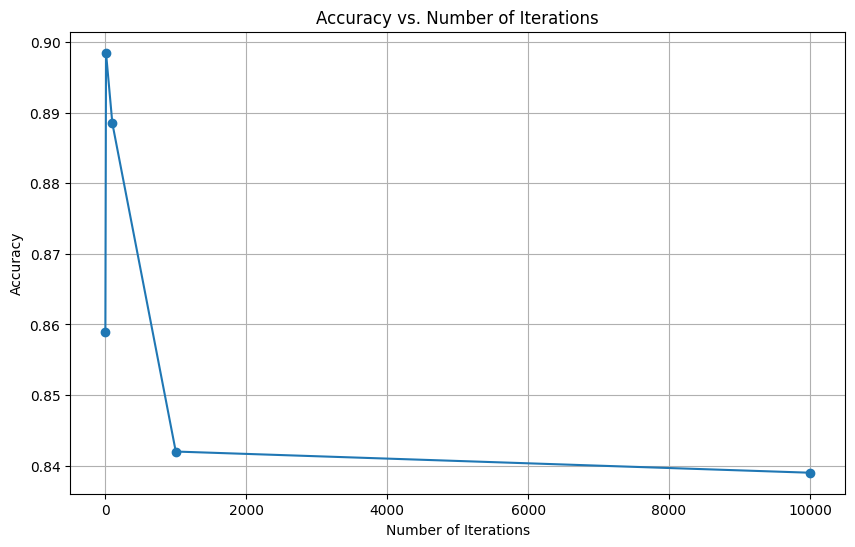

In [ ]:
iteration_numbers = [1, 10, 100, 1000, 10000]
accuracies = []

for iteration in iteration_numbers:
    perceptron = Perceptron(0.1 ,iteration)
    perceptron.fit(X_train, y_train)
    predictions = perceptron.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    print(f'Accuracy with {iteration} iterations: {accuracy}')

plt.figure(figsize=(10, 6))
plt.plot(iteration_numbers, accuracies, marker='o')
plt.title('Accuracy vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Accuracy with 0.01 : 0.8885
Accuracy with 0.1 : 0.8885
Accuracy with 1 : 0.8885
Accuracy with 10 : 0.8885
Accuracy with 100 : 0.8885


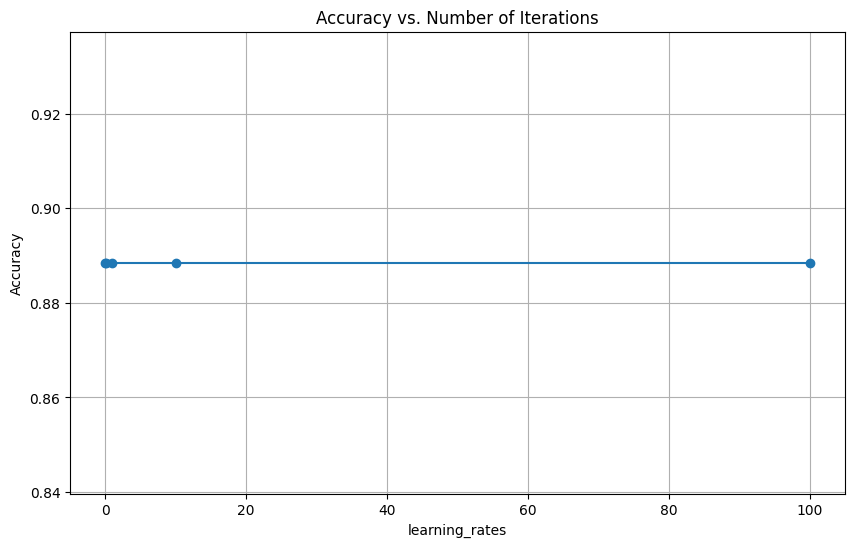

In [ ]:
learning_rates = [0.01, 0.1, 1, 10, 100]
accuracies = []

for rate in learning_rates:
    perceptron = Perceptron(rate, 100)
    perceptron.fit(X_train, y_train)
    predictions = perceptron.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    print(f'Accuracy with {rate} : {accuracy}')

plt.figure(figsize=(10, 6))
plt.plot(learning_rates, accuracies, marker='o')
plt.title('Accuracy vs. Number of Iterations')
plt.xlabel('learning_rates')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Same process with MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Accuracy with 1 iterations: 0.258
Accuracy with 10 iterations: 0.258
Accuracy with 100 iterations: 0.7475
Accuracy with 1000 iterations: 0.8265
Accuracy with 10000 iterations: 0.8685


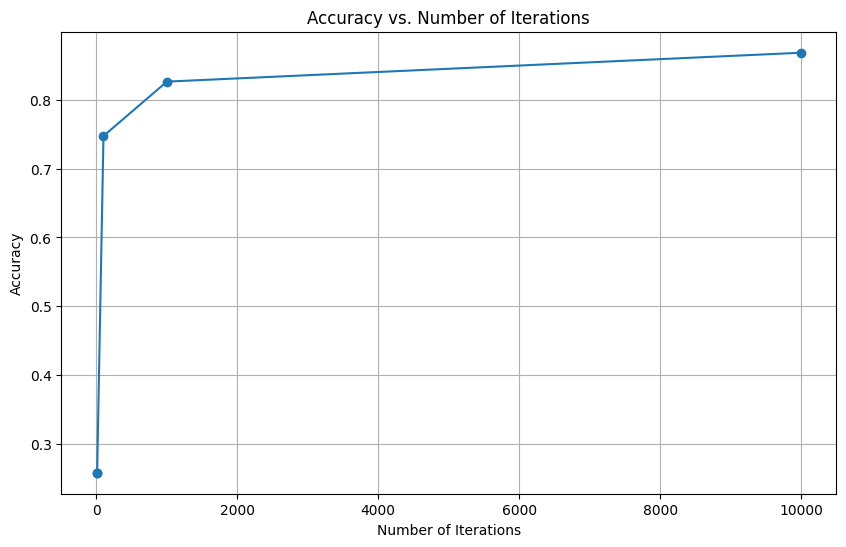

In [ ]:
iteration_numbers = [1, 10, 100, 1000, 10000]
accuracies = []

for iteration in iteration_numbers:
    perceptron = Perceptron(0.1 ,iteration)
    perceptron.fit(X_train, y_train)
    predictions = perceptron.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    print(f'Accuracy with {iteration} iterations: {accuracy}')

plt.figure(figsize=(10, 6))
plt.plot(iteration_numbers, accuracies, marker='o')
plt.title('Accuracy vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


Accuracy with 0.01 : 0.7475
Accuracy with 0.1 : 0.7475
Accuracy with 1 : 0.7475
Accuracy with 10 : 0.7475
Accuracy with 100 : 0.7475


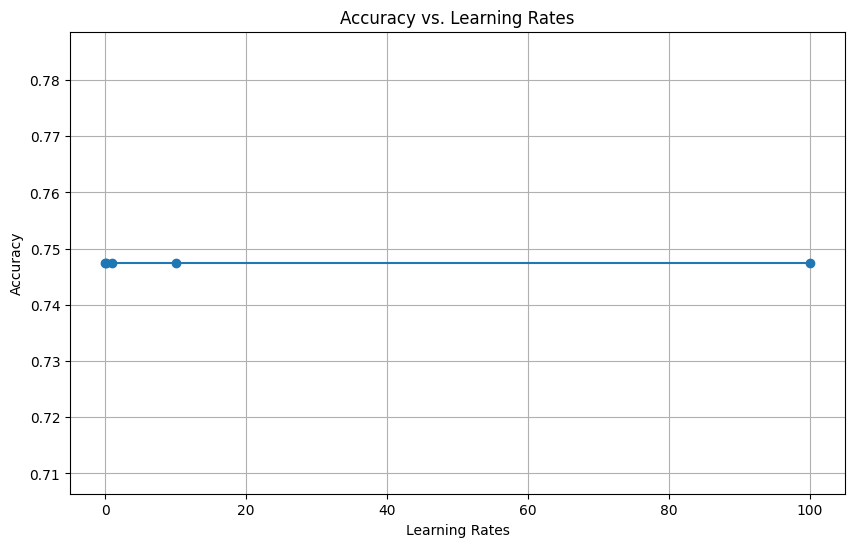

In [ ]:
learning_rates = [0.01, 0.1, 1, 10, 100]
accuracies = []

for rate in learning_rates:
    perceptron = Perceptron(rate, 100)
    perceptron.fit(X_train, y_train)
    predictions = perceptron.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    print(f'Accuracy with {rate} : {accuracy}')

plt.figure(figsize=(10, 6))
plt.plot(learning_rates, accuracies, marker='o')
plt.title('Accuracy vs. Learning Rates')
plt.xlabel('Learning Rates')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM accuracy: {accuracy_svm}")

SVM accuracy: 0.9845


In conclusion, I see that the MinMaxScaler is much better than the StandardScaler based on the same operations above. When I change the iteration numbers and plot, I see a healthier graph based on my theoretical knowledge. Therefore, I think the MinMaxScaler should be chosen

### 2.5 Evaluating SVM for Linear Classification (5 points)

In [ ]:
## Import SVM model from scikit-learn.
from sklearn import svm
from sklearn import metrics

In [ ]:
## Train the SVM model on the training set.
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)

In [ ]:
## Evaluate the model's performance on the test set by calculating accuracy. Comment on the score.
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)
print(f"SVM accuracy: {accuracy_svm}")


SVM accuracy: 0.982


### 2.6 Results Analysis and Conclusion (15 points)

In [ ]:
## Compare the performance of Perceptron and SVM models in terms of accuracy.
## Discuss the strengths and limitations of each model.
## Summarize key findings from the classification analysis.

When I used two models for the same task, I saw that SVM was much more accurate than the perceptron. I identified the following as the reasons for this.

1.  SVM creates a decision boundary that is as far away as possible from the nearest data points.
2.   SVM can handle non-linearly separable data and complex decision boundaries.

On the other hand, the perceptron algorithm assumes that the sample points are linearly seperable. It does not optimize the distance and does not use the kernel trick.
